In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data loading

In [3]:
DATA_DIR = '/kaggle/input/testwebbeetask' # set directory with the dataset

In [4]:
# read train/test data and sample_submission 
train_df=pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df=pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

# Data cleaning

In [5]:
# check train dataset for null
train_df.isnull().sum()

LandContour      0
GarageYrBlt     81
FullBath         0
1stFlrSF         0
BsmtFinSF1       0
TotRmsAbvGrd     0
ExterQual        0
OpenPorchSF      0
Heating          0
Condition2       0
OverallQual      0
GarageCars       0
KitchenQual      0
KitchenAbvGr     0
GrLivArea        0
2ndFlrSF         0
CentralAir       0
BsmtQual        37
TotalBsmtSF      0
Fireplaces       0
SalePrice        0
dtype: int64

In [6]:
# set median value as a garage Year built
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median().round(0))
# Due to the data descripition file, NaN here stands for no basement -> setting 'No'-string
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('No') 

In [7]:
# check that no NaN left
train_df.isnull().sum()

LandContour     0
GarageYrBlt     0
FullBath        0
1stFlrSF        0
BsmtFinSF1      0
TotRmsAbvGrd    0
ExterQual       0
OpenPorchSF     0
Heating         0
Condition2      0
OverallQual     0
GarageCars      0
KitchenQual     0
KitchenAbvGr    0
GrLivArea       0
2ndFlrSF        0
CentralAir      0
BsmtQual        0
TotalBsmtSF     0
Fireplaces      0
SalePrice       0
dtype: int64

# EDA

## Basic

In [8]:
# check the data samples
train_df.sample(7)

,LandContour,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,ExterQual,OpenPorchSF,Heating,Condition2,...,GarageCars,KitchenQual,KitchenAbvGr,GrLivArea,2ndFlrSF,CentralAir,BsmtQual,TotalBsmtSF,Fireplaces,SalePrice
938,Lvl,2006.0,2,1391,464,7,Gd,90,GasA,Norm,...,3,Gd,1,1962,571,Y,Gd,1391,0,239799
447,Lvl,1998.0,2,956,0,10,Gd,0,GasA,Norm,...,2,Gd,1,1886,930,Y,Gd,930,1,199900
609,Lvl,1961.0,1,1029,903,5,TA,0,GasA,Norm,...,1,TA,1,1029,0,Y,TA,1029,0,118500
1026,Lvl,1960.0,1,1264,697,6,TA,0,GasA,Norm,...,2,TA,1,1264,0,Y,TA,1268,2,167500
712,HLS,1988.0,2,1228,767,5,Gd,120,GasA,Norm,...,2,Gd,1,1228,0,Y,Gd,1228,1,189000
1018,Lvl,1991.0,2,802,0,7,Gd,0,GasA,Norm,...,2,Gd,1,1472,670,Y,Gd,384,1,160000
776,Lvl,2005.0,2,1614,20,7,Gd,59,GasA,Norm,...,3,Gd,1,1614,0,Y,Gd,1614,0,221500


In [9]:
train_df.describe()

,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,OpenPorchSF,OverallQual,GarageCars,KitchenAbvGr,GrLivArea,2ndFlrSF,TotalBsmtSF,Fireplaces,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1978.589041,1.565068,1162.626712,443.639726,6.517808,46.660274,6.099315,1.767123,1.046575,1515.463699,346.992466,1057.429452,0.613014,180921.195890
std,23.997022,0.550916,386.587738,456.098091,1.625393,66.256028,1.382997,0.747315,0.220338,525.480383,436.528436,438.705324,0.644666,79442.502883
min,1900.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,1962.000000,1.000000,882.000000,0.000000,5.000000,0.000000,5.000000,1.000000,1.000000,1129.500000,0.000000,795.750000,0.000000,129975.000000
50%,1980.000000,2.000000,1087.000000,383.500000,6.000000,25.000000,6.000000,2.000000,1.000000,1464.000000,0.000000,991.500000,1.000000,163000.000000
75%,2001.000000,2.000000,1391.250000,712.250000,7.000000,68.000000,7.000000,2.000000,1.000000,1776.750000,728.000000,1298.250000,1.000000,214000.000000
max,2010.000000,3.000000,4692.000000,5644.000000,14.000000,547.000000,10.000000,4.000000,3.000000,5642.000000,2065.000000,6110.000000,3.000000,755000.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LandContour   1460 non-null   object 
 1   GarageYrBlt   1460 non-null   float64
 2   FullBath      1460 non-null   int64  
 3   1stFlrSF      1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   int64  
 5   TotRmsAbvGrd  1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   OpenPorchSF   1460 non-null   int64  
 8   Heating       1460 non-null   object 
 9   Condition2    1460 non-null   object 
 10  OverallQual   1460 non-null   int64  
 11  GarageCars    1460 non-null   int64  
 12  KitchenQual   1460 non-null   object 
 13  KitchenAbvGr  1460 non-null   int64  
 14  GrLivArea     1460 non-null   int64  
 15  2ndFlrSF      1460 non-null   int64  
 16  CentralAir    1460 non-null   object 
 17  BsmtQual      1460 non-null   object 
 18  TotalBsmtSF   1460 non-null 

## Distribution of a target variable SalePrice

In [11]:
print(train_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


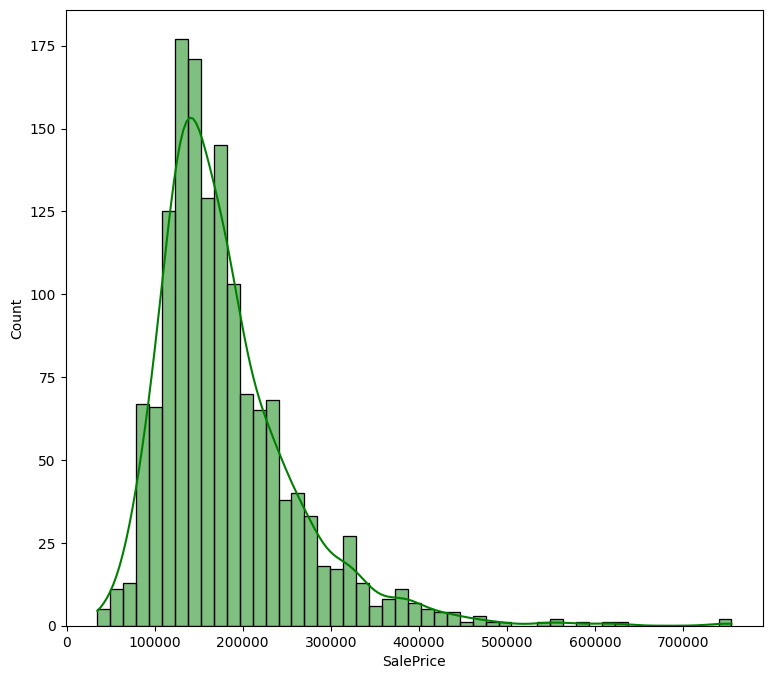

In [12]:
plt.figure(figsize=(9, 8))
sns.histplot(train_df['SalePrice'], color="g", kde=True)
None

In [13]:
train_df['Log_SalePrice'] = np.log1p(train_df['SalePrice']) # Due to the dist it's better to take ln of SalePrice

In [14]:
train_df = train_df.drop('SalePrice', axis=1) # left only Log of SalePrice in the dataframe

## Categorical features distribution

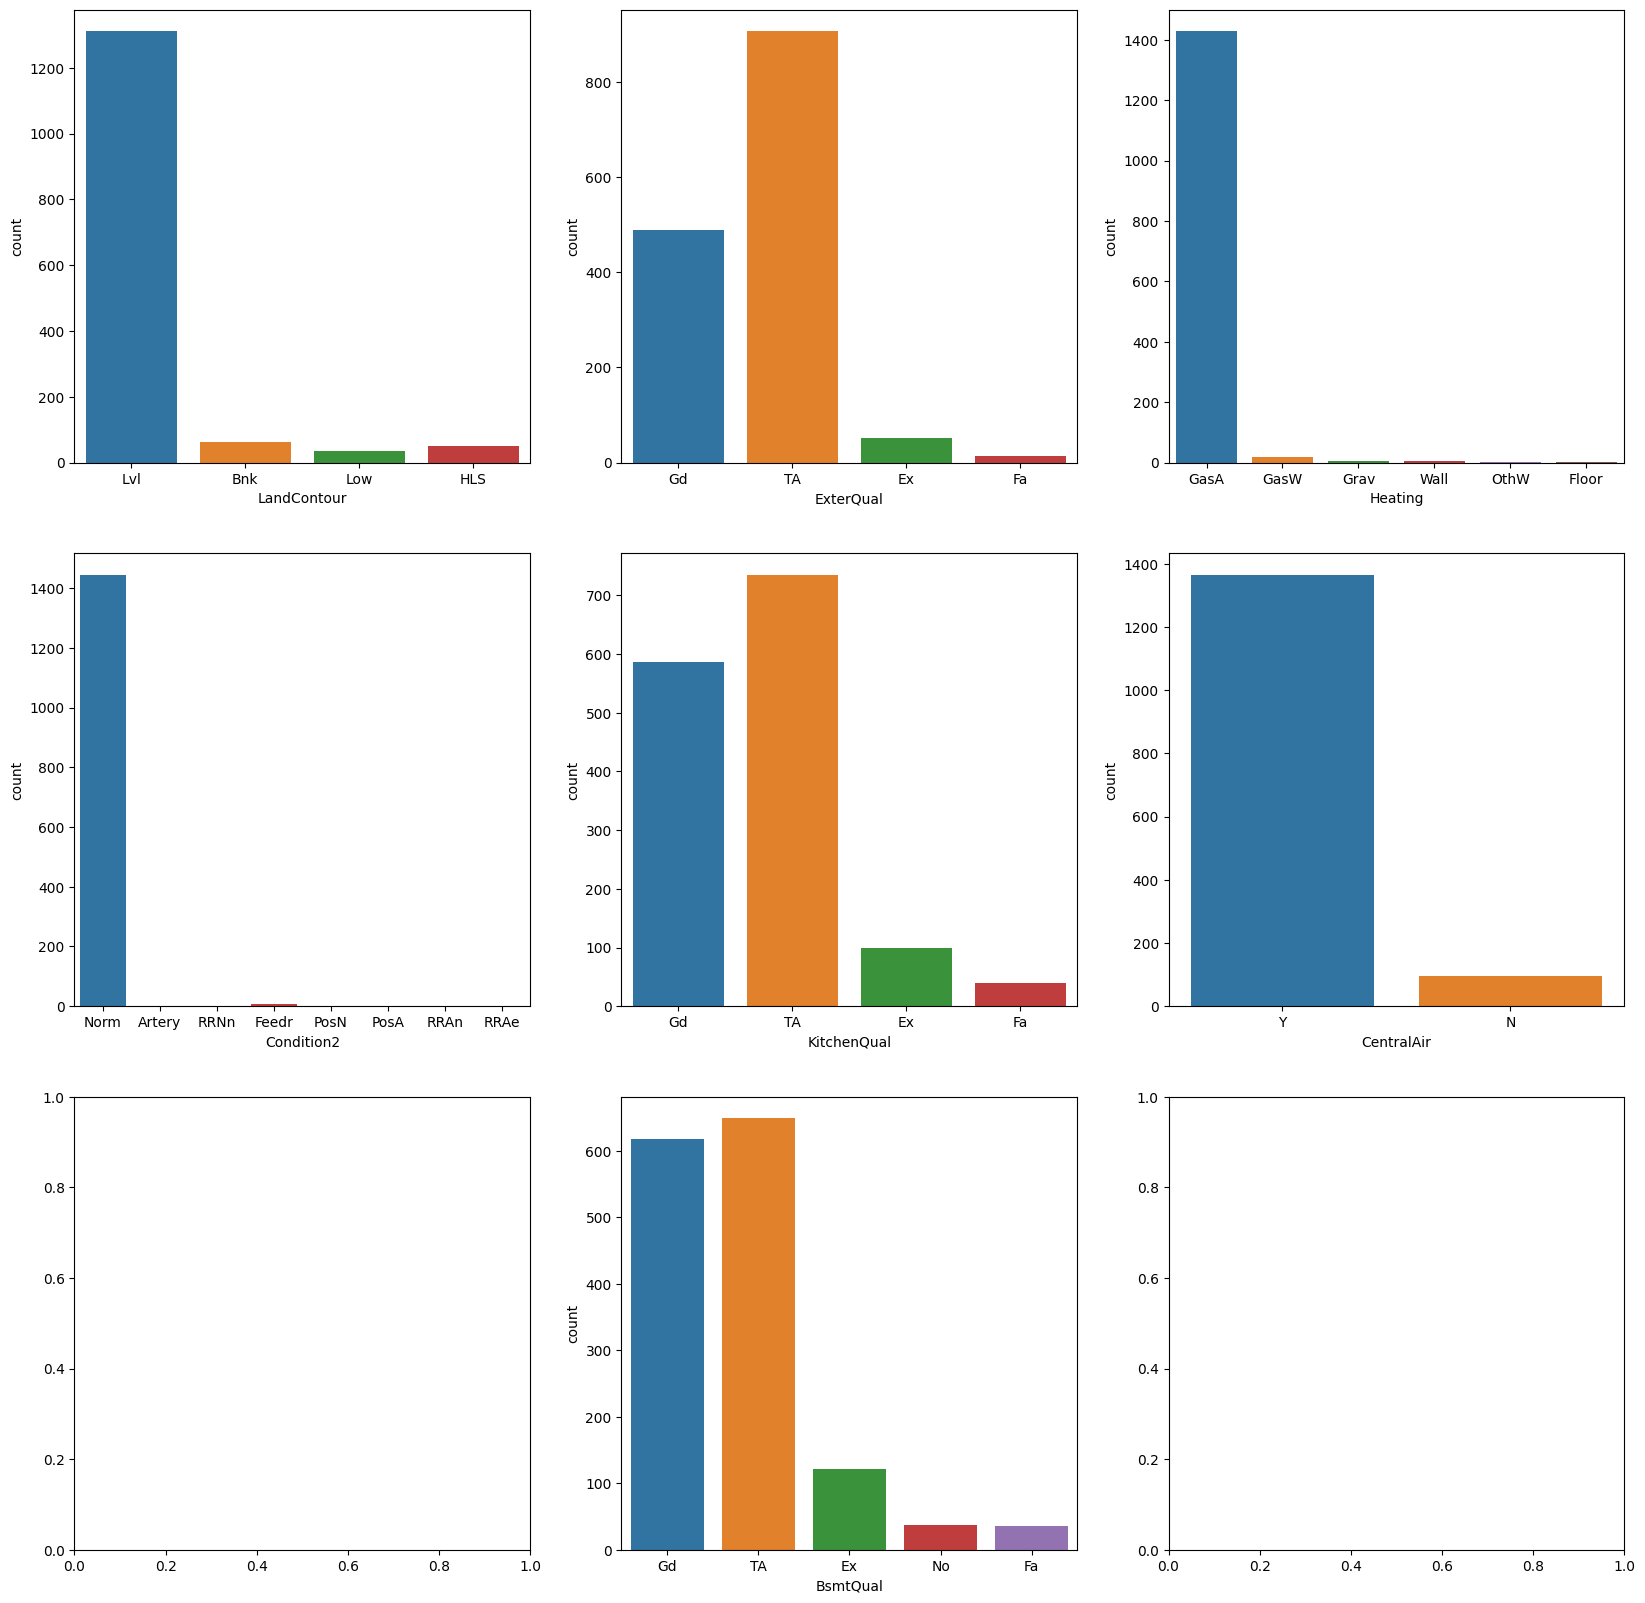

In [15]:
# check the distribution of categorical columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
sns.countplot(x='LandContour', data=train_df, ax=axs[0][0])
sns.countplot(x='ExterQual', data=train_df, ax=axs[0][1])
sns.countplot(x='Heating', data=train_df, ax=axs[0][2])
sns.countplot(x='Condition2', data=train_df, ax=axs[1][0])
sns.countplot(x='KitchenQual', data=train_df, ax=axs[1][1])
sns.countplot(x='CentralAir', data=train_df, ax=axs[1][2])
sns.countplot(x='BsmtQual', data=train_df, ax=axs[2][1])
None

In [16]:
# check if Condion2 really has only 2 non-zero value - as it looks like on the plot.
train_df.Condition2.value_counts() # no, all values are non-zero, but small in the comparison

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

## Numerical features distribution

In [17]:
# gather all the numerical cols
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,GarageYrBlt,FullBath,1stFlrSF,BsmtFinSF1,TotRmsAbvGrd,OpenPorchSF,OverallQual,GarageCars,KitchenAbvGr,GrLivArea,2ndFlrSF,TotalBsmtSF,Fireplaces,Log_SalePrice
0,2003.0,2,856,706,8,61,7,2,1,1710,854,856,0,12.247699
1,1976.0,2,1262,978,6,0,6,2,1,1262,0,1262,1,12.109016
2,2001.0,2,920,486,6,42,7,2,1,1786,866,920,1,12.317171
3,1998.0,1,961,216,7,35,7,3,1,1717,756,756,1,11.849405
4,2000.0,2,1145,655,9,84,8,3,1,2198,1053,1145,1,12.429220


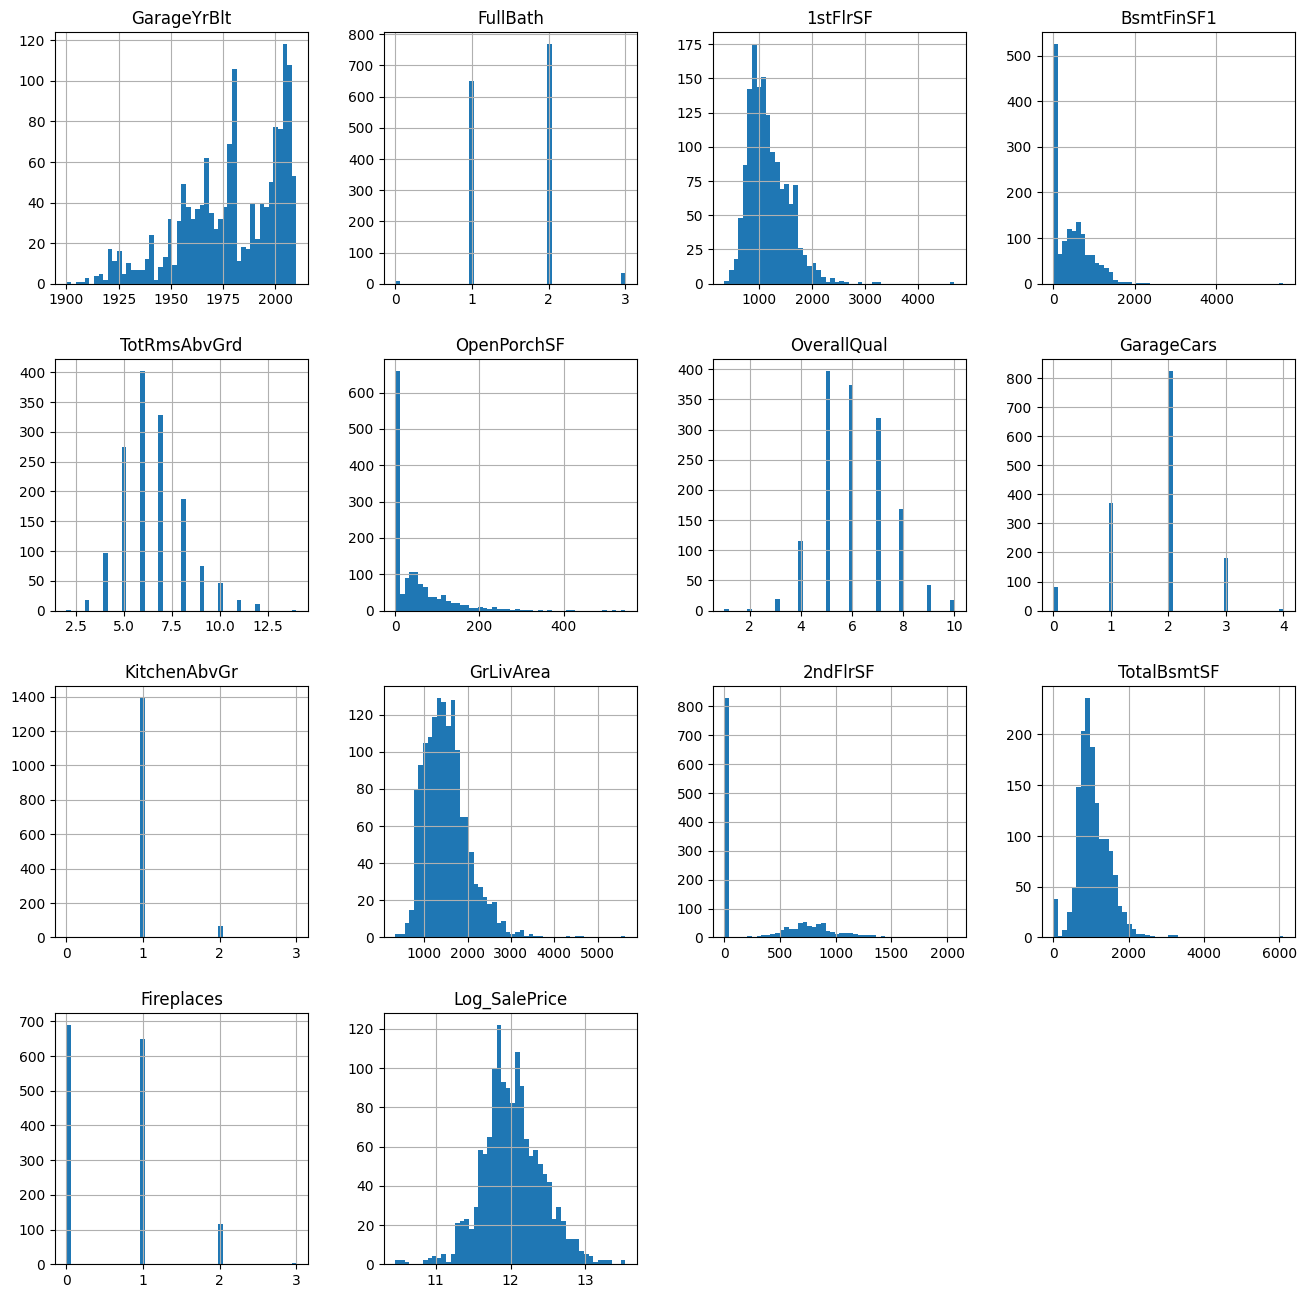

In [18]:
# now make hists of all numerical feature's columns
df_num.hist(bins=50, figsize=(16, 16))
None

По гистограммам видно, что некоторые признаки имеют, скорее всего, логнормальное распределение. Поэтому возьмем от  них логарифм и посмотрим.

In [19]:
train_df.columns

Index(['LandContour', 'GarageYrBlt', 'FullBath', '1stFlrSF', 'BsmtFinSF1',
       'TotRmsAbvGrd', 'ExterQual', 'OpenPorchSF', 'Heating', 'Condition2',
       'OverallQual', 'GarageCars', 'KitchenQual', 'KitchenAbvGr', 'GrLivArea',
       '2ndFlrSF', 'CentralAir', 'BsmtQual', 'TotalBsmtSF', 'Fireplaces',
       'Log_SalePrice'],
      dtype='object')

In [20]:
# take logarithm of some features and drop original cols
train_df['Log_GrLivArea'] = np.log1p(train_df['GrLivArea'])
train_df = train_df.drop('GrLivArea', axis=1)

train_df['Log_TotalBsmtSF'] = np.log1p(train_df['TotalBsmtSF'])
train_df = train_df.drop('TotalBsmtSF', axis=1)

train_df['Log_1stFlrSF'] = np.log1p(train_df['1stFlrSF'])
train_df = train_df.drop('1stFlrSF', axis=1)

train_df['Log_BsmtFinSF1'] = np.log1p(train_df['BsmtFinSF1'])
train_df = train_df.drop('BsmtFinSF1', axis=1)

train_df['Log_OpenPorchSF'] = np.log1p(train_df['OpenPorchSF'])
train_df = train_df.drop('OpenPorchSF', axis=1)

train_df['Log_2ndFlrSF'] = np.log1p(train_df['2ndFlrSF'])
train_df = train_df.drop('2ndFlrSF', axis=1)

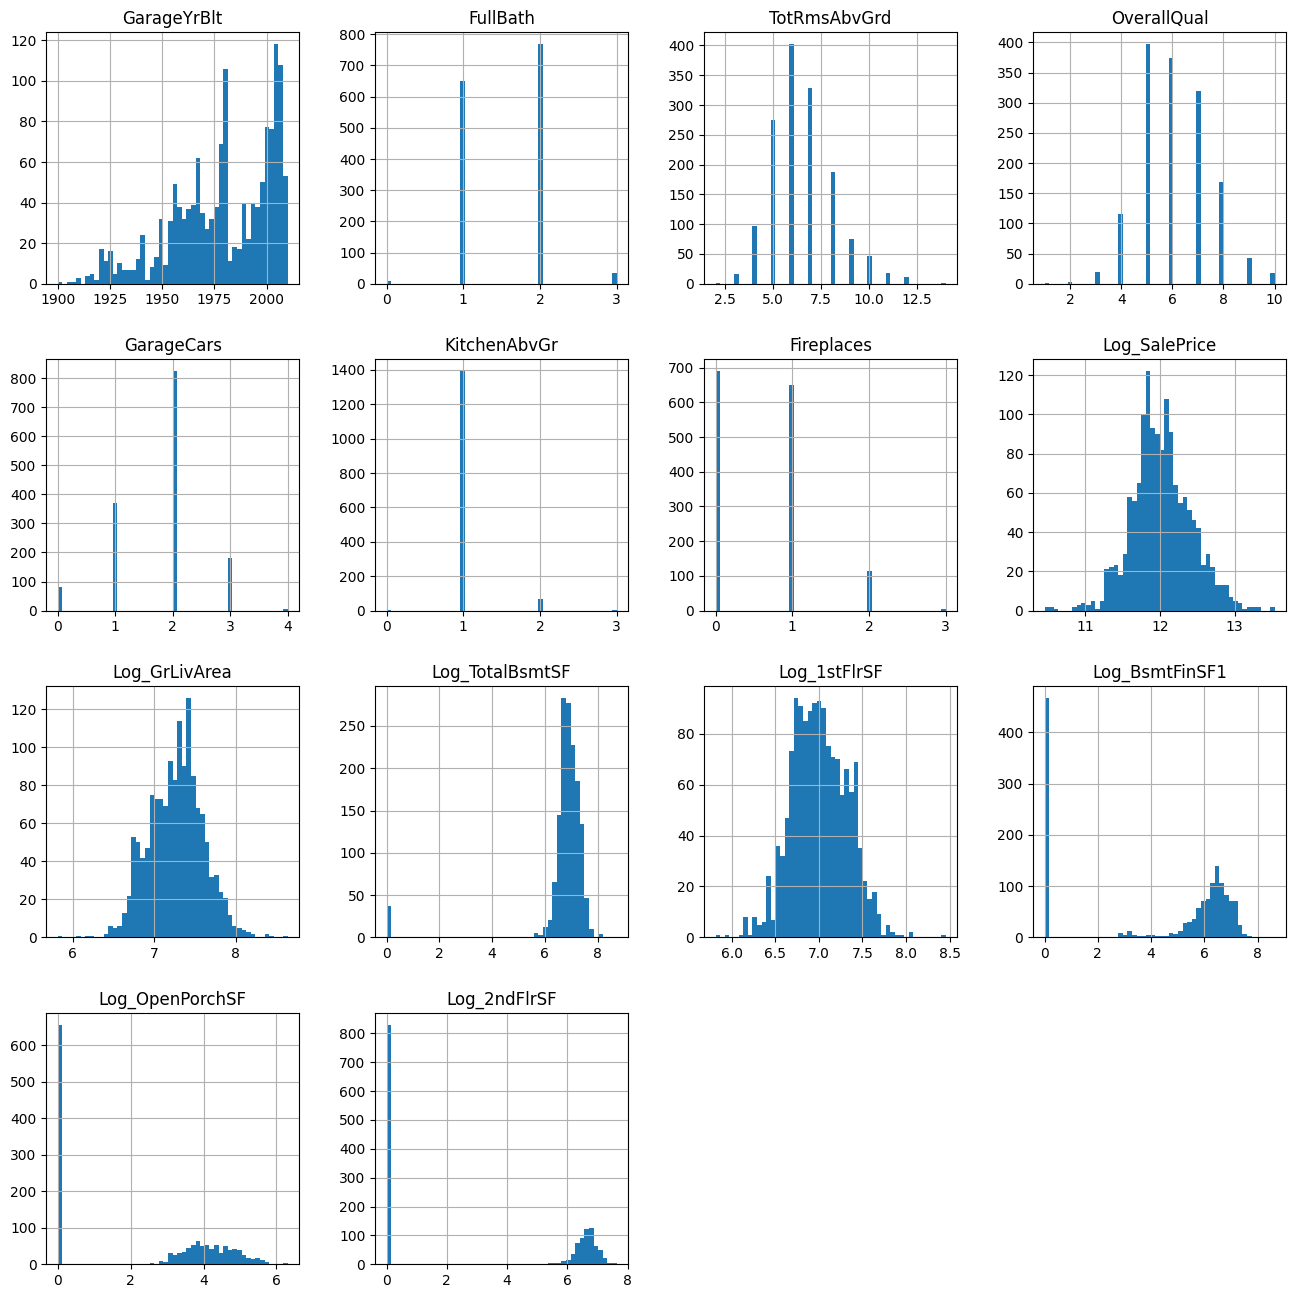

In [21]:
# again make hists of all numerical feature's columns
train_df.select_dtypes(include = ['float64', 'int64']).hist(bins=50, figsize=(16, 16))
None

## Feature's influence on the target variable

In [22]:
def plot_scatter(df, x, y, hue=None, title = ''):
    df = df.copy()
    if hue:
        df[hue] = df[hue].astype('category')
    plt.figure(figsize=(10, 10))
    title = f' {y} on {x} by {hue}' if not title else title
    ax = sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.title(title)
    return ax

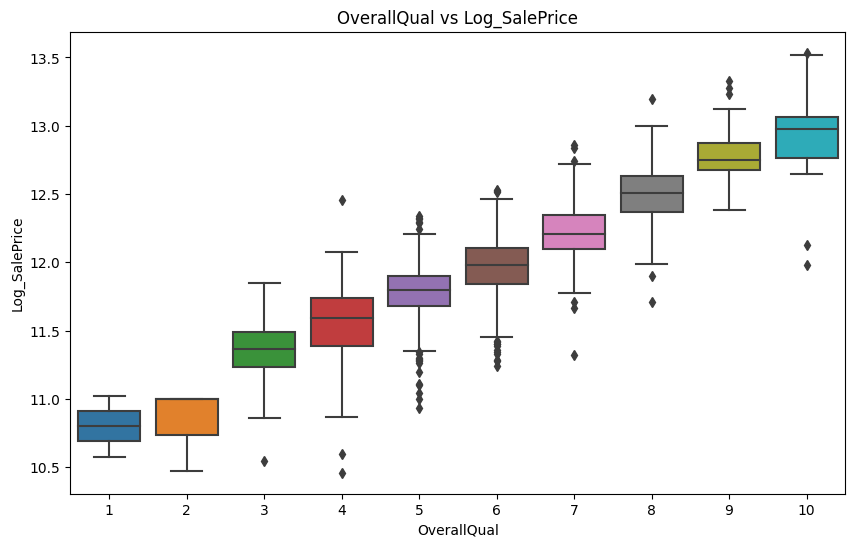

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='Log_SalePrice', data=train_df)
plt.title('OverallQual vs Log_SalePrice')
plt.show()

Гипотеза была в том, что есть прямая зависимость качетсва OverallQual и финальной ценой SalePrice (или логарифмом от цены). Гипотеза опрадвалась, на графике медианная цена растет при увеличении OverallQual. Как позже будет посчиато, корреляция между  этими двумя параметрами равна 0.82

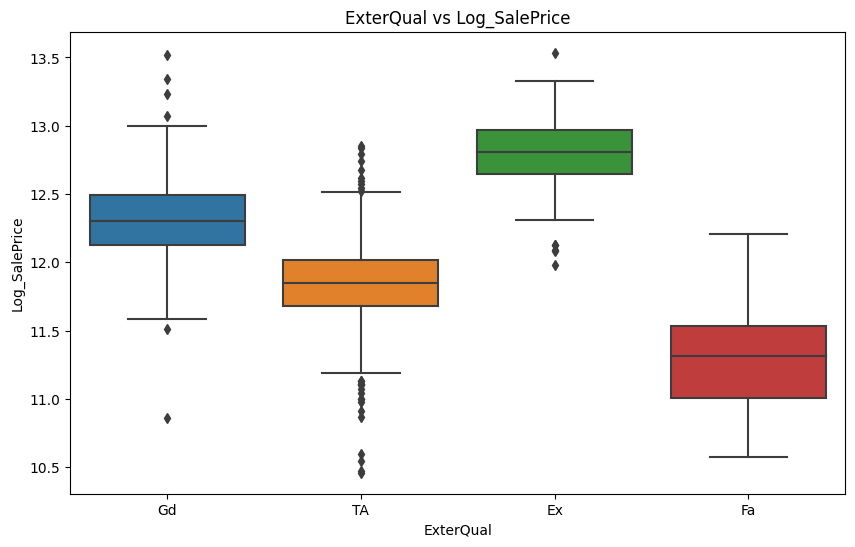

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ExterQual', y='Log_SalePrice', data=train_df)
plt.title('ExterQual vs Log_SalePrice')
plt.show()

Можно наблюдать зависимость и с категориальным параметром ExterQual - чем выше оценка, тем больше медианное значение. Кореляция составляет 0.68

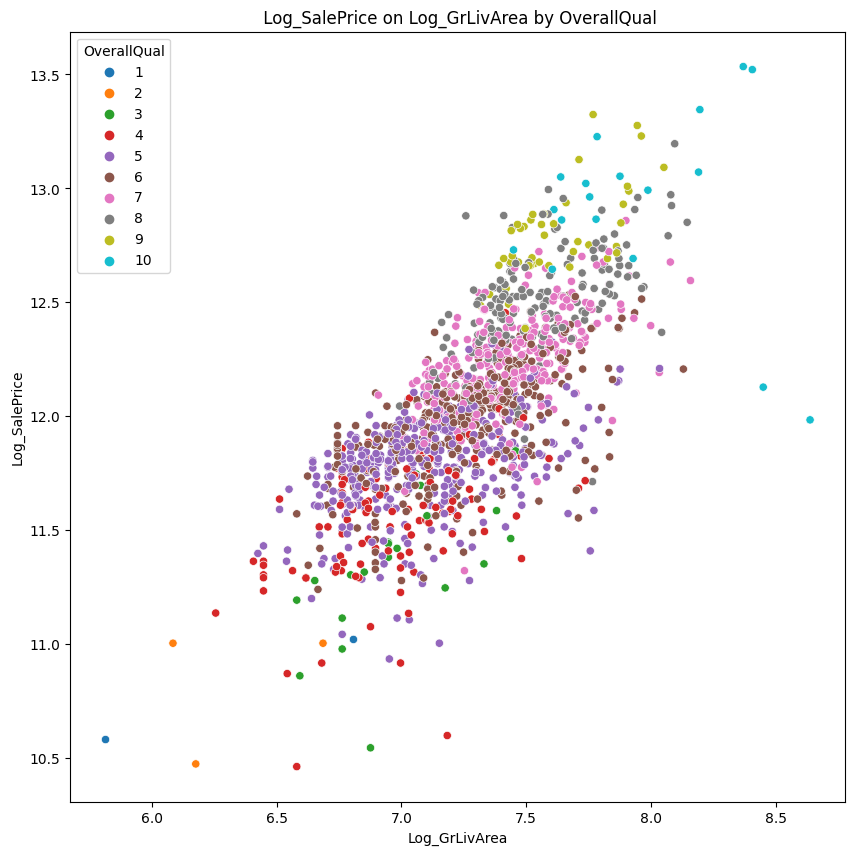

In [25]:
plot_scatter(train_df,'Log_GrLivArea','Log_SalePrice',hue = 'OverallQual')
None

По графику выше можно предположить существование линейной зависимости между фичей GrLivArea и ценой продажи SalePrice.
Также здесь можно заподозрить наличие корреляции между GrLiveArea и признаком OverallQual.
Запоним этот результат и проверим на этапе построения корелляционной матрицы. 

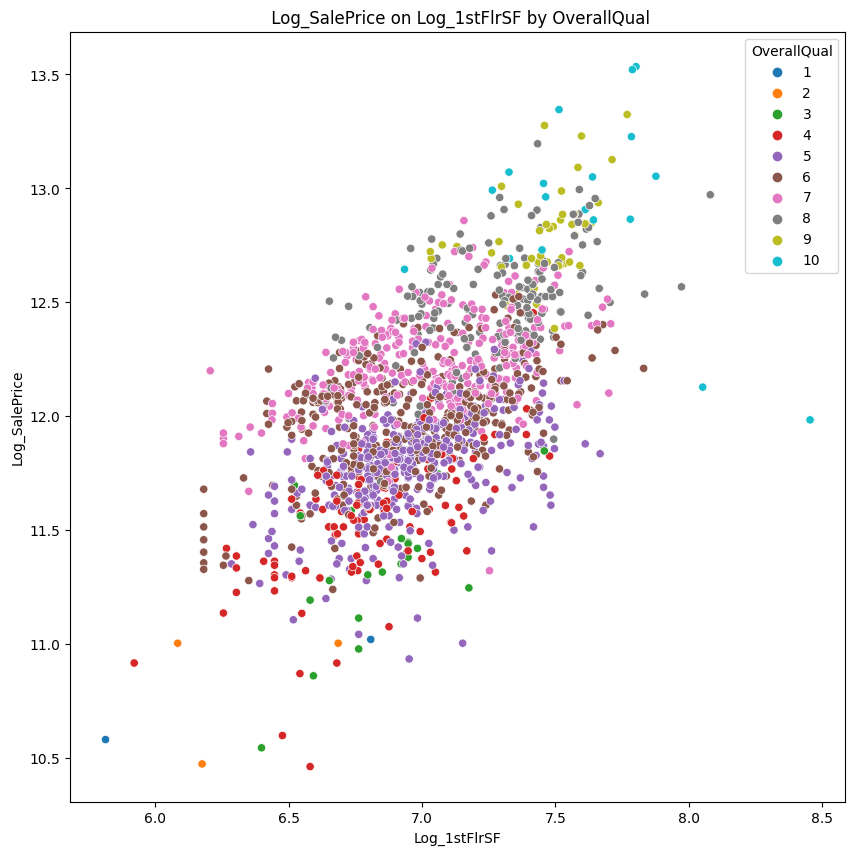

In [26]:
plot_scatter(train_df,'Log_1stFlrSF','Log_SalePrice',hue = 'OverallQual')
None

Наличие зависимости видимо есть и между 1stFlrSF и SalePrice. 

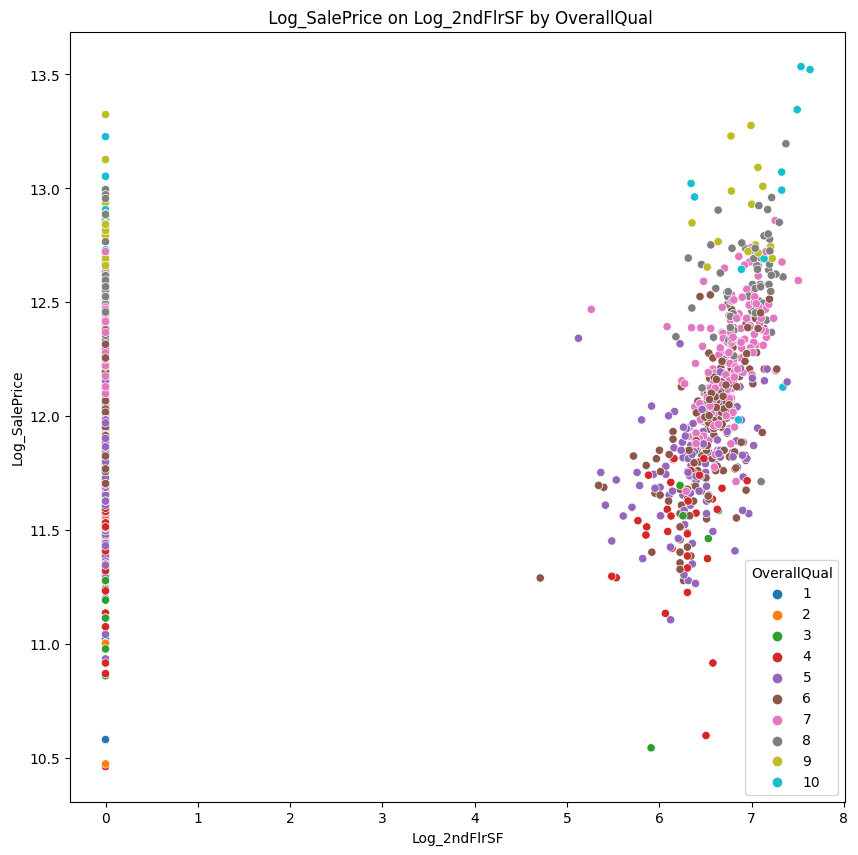

In [27]:
plot_scatter(train_df,'Log_2ndFlrSF','Log_SalePrice',hue = 'OverallQual')
None

А вот с признаком 2ndFlrSF  - не всё-так однозначно. Судя по графику, корреляция между этим признаком и таргетом не очень большая

# Data preparation

## Encoding

In [28]:
train_df.columns

Index(['LandContour', 'GarageYrBlt', 'FullBath', 'TotRmsAbvGrd', 'ExterQual',
       'Heating', 'Condition2', 'OverallQual', 'GarageCars', 'KitchenQual',
       'KitchenAbvGr', 'CentralAir', 'BsmtQual', 'Fireplaces', 'Log_SalePrice',
       'Log_GrLivArea', 'Log_TotalBsmtSF', 'Log_1stFlrSF', 'Log_BsmtFinSF1',
       'Log_OpenPorchSF', 'Log_2ndFlrSF'],
      dtype='object')

In [29]:
# change 'object' type to 'category' type
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].astype('category')

In [30]:
# map for binary Y/N features
yes_or_no_conversion_map = {
    'Y' : 1,
    'N' : 0,
}
# ordinal features map
evaluation_conversion_map = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'No' : 0,
}

In [31]:
# mapping ordinal categorical features 
train_df['BsmtQual'] = train_df['BsmtQual'].map(evaluation_conversion_map)
train_df['KitchenQual'] = train_df['KitchenQual'].map(evaluation_conversion_map)
train_df['ExterQual'] = train_df['ExterQual'].map(evaluation_conversion_map)

In [32]:
train_df['CentralAir'] = train_df['CentralAir'].map(yes_or_no_conversion_map) # mapping binary Yes/No features

In [33]:
train_df['CentralAir'].value_counts() # check that mapping was OK

CentralAir
1    1365
0      95
Name: count, dtype: int64

In [34]:
one_hot_encoder = OneHotEncoder(sparse_output=False) # encoder for the rest categorical features

In [35]:
categorical_cols = ['LandContour', 'Heating', 'Condition2'] # columns with categorical features fo OneHotEncoding

In [36]:
# creating one hot encoded cols
one_hot_encoded = one_hot_encoder.fit_transform(train_df[categorical_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

target_df = train_df['Log_SalePrice'] # extract target varible into a separate DataFrame
train_df = train_df.drop('Log_SalePrice', axis=1) # and delete target from train_df

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([train_df, one_hot_df], axis=1)
df = pd.concat([df, target_df], axis=1)
# Drop the original categorical columns
df = df.drop(categorical_cols, axis=1)

In [37]:
# Drop one of the columns of one-hot-encoding, for each category feature:
df = df.drop('LandContour_Low', axis=1)
df = df.drop('Heating_OthW', axis=1)
df = df.drop('Condition2_PosA', axis=1)

In [38]:
df.sample(7)

,GarageYrBlt,FullBath,TotRmsAbvGrd,ExterQual,OverallQual,GarageCars,KitchenQual,KitchenAbvGr,CentralAir,BsmtQual,...,Heating_Grav,Heating_Wall,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Log_SalePrice
158,2004.0,2,8,4,7,2,4,1,1,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.448631
318,1993.0,2,9,4,7,3,4,1,1,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.468441
123,1993.0,2,5,4,6,2,4,1,1,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.944065
307,1980.0,1,6,3,6,0,2,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.402005
325,1941.0,1,5,3,5,2,3,1,0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.373675
624,1972.0,1,8,3,6,2,3,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.014615
1063,1976.0,1,5,3,6,2,4,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.612780


## Scaling

In [39]:
scaler = MinMaxScaler()

In [40]:
model = scaler.fit(df)

In [41]:
scaled_df = model.transform(df)

In [42]:
df = pd.DataFrame(scaled_df, columns=df.columns)

In [43]:
df.sample(11)

,GarageYrBlt,FullBath,TotRmsAbvGrd,ExterQual,OverallQual,GarageCars,KitchenQual,KitchenAbvGr,CentralAir,BsmtQual,...,Heating_Grav,Heating_Wall,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Log_SalePrice
478,0.972727,0.666667,0.416667,0.666667,0.777778,0.75,0.666667,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.696512
987,1.000000,0.666667,0.500000,1.000000,0.888889,0.75,1.000000,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.789427
615,0.572727,0.333333,0.333333,0.333333,0.555556,0.50,0.666667,0.333333,1.0,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.446007
1301,0.381818,0.333333,0.416667,0.333333,0.555556,0.25,0.666667,0.333333,1.0,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.529067
742,0.909091,0.666667,0.333333,0.333333,0.666667,0.50,0.333333,0.333333,1.0,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.531805
221,0.927273,0.666667,0.500000,0.666667,0.555556,0.50,0.666667,0.333333,1.0,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.567889
880,0.954545,0.333333,0.250000,0.333333,0.444444,0.50,0.333333,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.489147
239,0.445455,0.333333,0.416667,0.333333,0.555556,0.25,0.333333,0.333333,1.0,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.382174
684,0.890909,0.666667,0.416667,0.666667,0.666667,0.50,0.333333,0.333333,1.0,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.600367
1287,0.581818,0.666667,0.416667,0.333333,0.444444,0.50,0.333333,0.333333,1.0,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.551204


# Feature selection

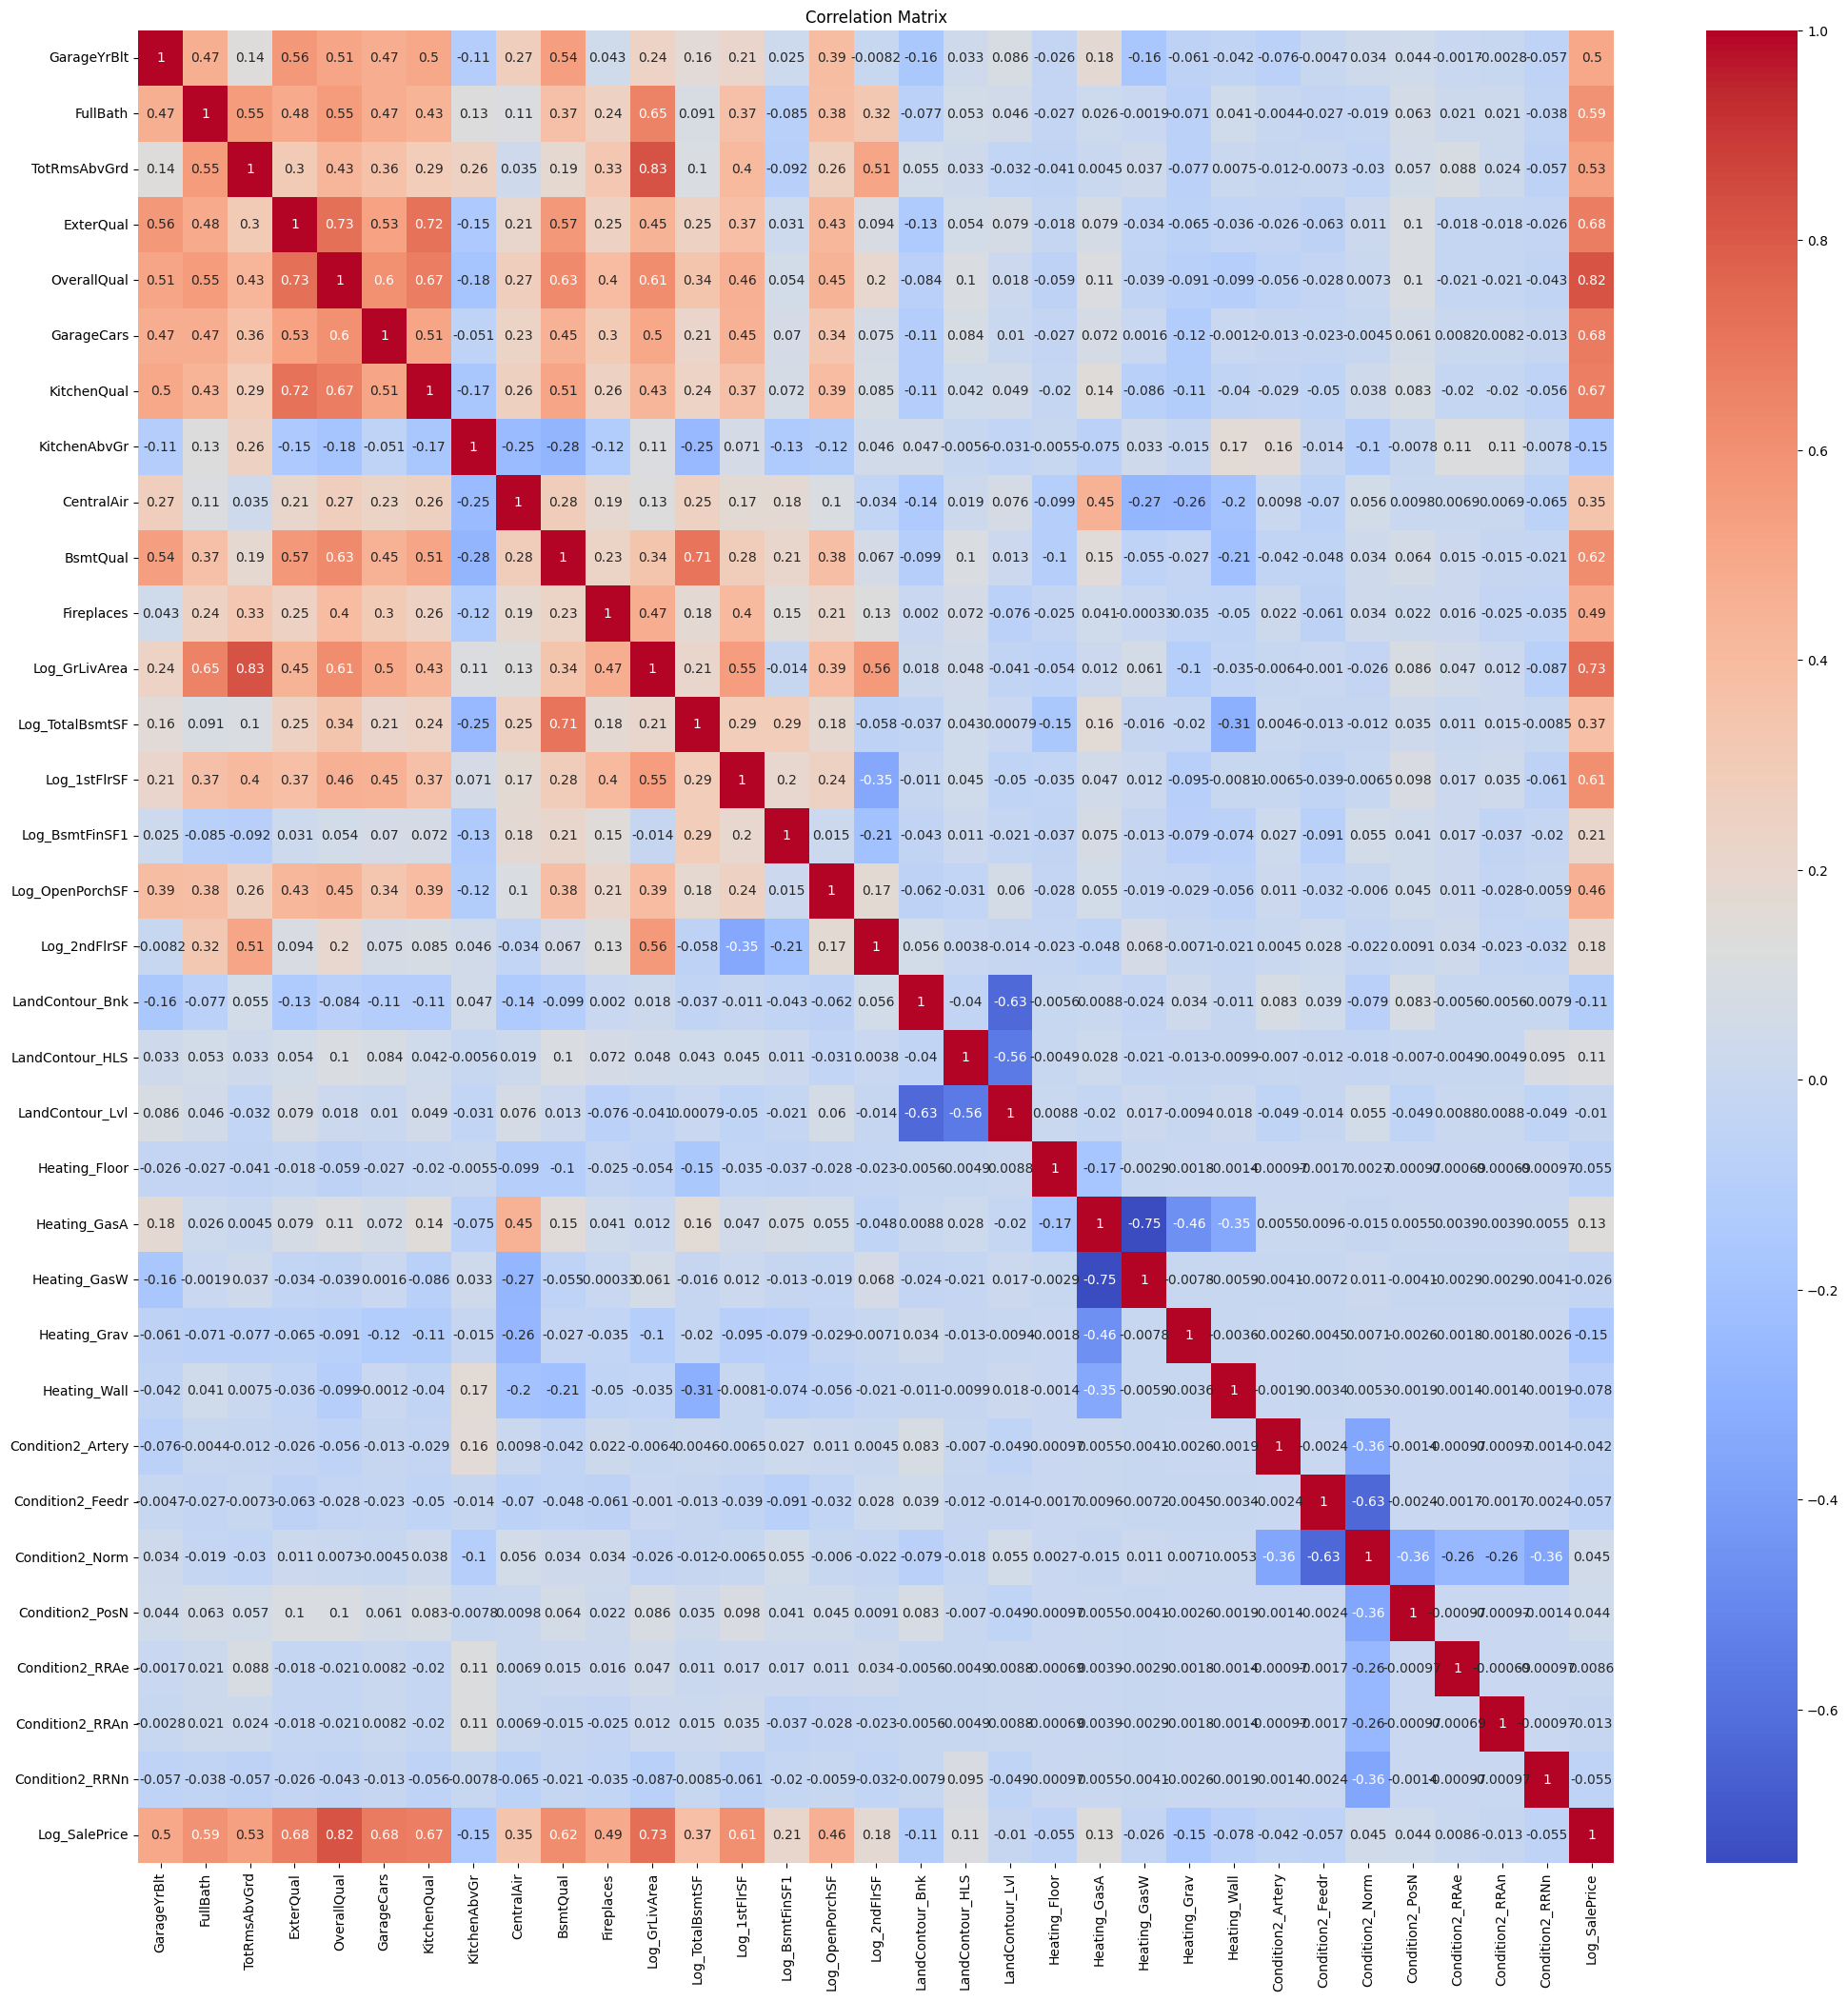

In [44]:
full_correlation_matrix = df.corr()

plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(full_correlation_matrix, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Matrix')

plt.show()

In [45]:
# prepare df for Regression model
regression_df = df[['OverallQual', 'Log_GrLivArea', 'Log_1stFlrSF', 'GarageCars']].copy()
y_labels = df['Log_SalePrice'].copy()

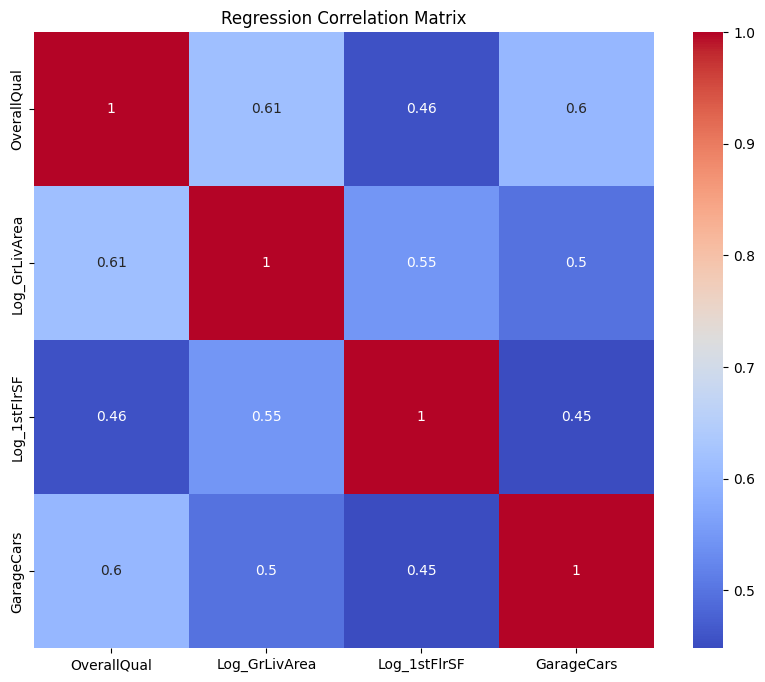

In [46]:
# Plot correlation matrix on a fewer features
regression_correlation_matrix = regression_df.corr()
plt.figure(figsize=(10, 8))
final_heatmap = sns.heatmap(regression_correlation_matrix, annot=True, cmap='coolwarm')
final_heatmap.set_title('Regression Correlation Matrix')

plt.show()

In [47]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   float64
 1   Log_GrLivArea  1460 non-null   float64
 2   Log_1stFlrSF   1460 non-null   float64
 3   GarageCars     1460 non-null   float64
dtypes: float64(4)
memory usage: 45.8 KB


In [48]:
y_labels.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Log_SalePrice
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


# Data split into train/val

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(regression_df)
y = np.array(y_labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25) 

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 4), (365, 4), (1095,), (365,))

In [ ]:
X_train[1].shape

(4,)

# Keras

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-05-29 14:23:57.391811: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 14:23:57.391995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 14:23:57.537913: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [54]:
# build NN-modek for Regression Task
model = keras.Sequential([
    layers.Input(shape=(4, )),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])
model.compile(optimizer='rmsprop', loss='mse', metrics=['R2Score', 'mae'])

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
NN_results = model.fit(X_train, y_train,batch_size=8, epochs=51, validation_data=(X_val, y_val))

Epoch 1/51
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - R2Score: -5.3163 - loss: 0.1123 - mae: 0.2657 - val_R2Score: 0.7077 - val_loss: 0.0048 - val_mae: 0.0509
Epoch 2/51
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.7566 - loss: 0.0043 - mae: 0.0482 - val_R2Score: 0.7561 - val_loss: 0.0040 - val_mae: 0.0453
Epoch 3/51
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.7850 - loss: 0.0038 - mae: 0.0448 - val_R2Score: 0.7639 - val_loss: 0.0039 - val_mae: 0.0440
Epoch 4/51
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - R2Score: 0.7558 - loss: 0.0036 - mae: 0.0430 - val_R2Score: 0.7689 - val_loss: 0.0038 - val_mae: 0.0436
Epoch 5/51
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - R2Score: 0.8101 - loss: 0.0033 - mae: 0.0422 - val_R2Score: 0.7735 - val_loss: 0.0038 - val_mae: 0.0441
Epoch 6/51
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - R2Score: 0.7996 - loss: 0.0035 - mae: 0.0434 - val_R2Score: 0.7724 - val_loss: 0.0038 - val_mae: 0.0438
Epoch 7/51
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

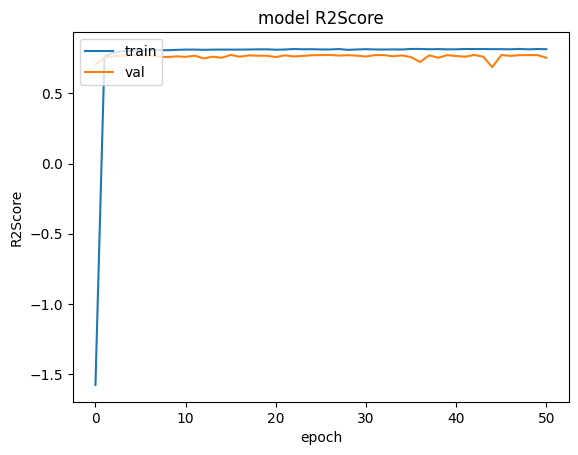

In [57]:
plt.plot(NN_results.history['R2Score'])
plt.plot(NN_results.history['val_R2Score'])
plt.title('model R2Score')
plt.ylabel('R2Score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [58]:
model.evaluate(X_val, y_val)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.7426 - loss: 0.0040 - mae: 0.0442 


[0.004080620128661394, 0.7540072202682495, 0.043570924550294876]

Regression with neural network stat
======================
* R2Score: 0.7426 
* MSE: 0.0040
* MAE: 0.0442

# RandomForest

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [61]:
# estimate the better N_estimators parametr
cv_folds = 10
N_estimators = [20, 50, 100, 150, 200, 250, 300]
test_scores = []
max_features = int(np.sqrt(X_train.shape[1]))+1

for N in N_estimators:
    clf = RandomForestRegressor(n_estimators=N, max_features=max_features)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=cv_folds,
                                         scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [62]:
min_error_index = np.argmin(test_scores)
N_estimators[min_error_index], test_scores[min_error_index]

(250, 0.058949544390442574)

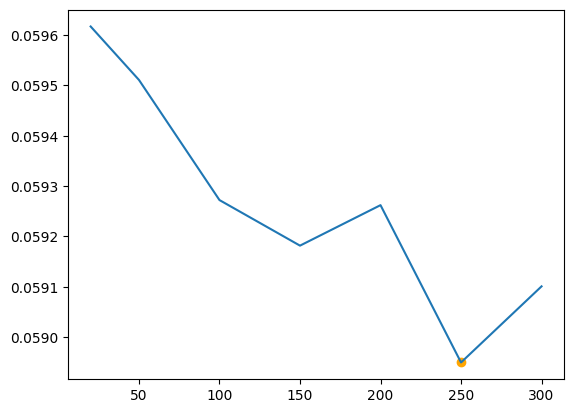

In [63]:
plt.scatter(N_estimators[min_error_index], test_scores[min_error_index], color='orange')
plt.plot(N_estimators, test_scores)

In [64]:
# build RandomForestRegressor model with n_estimators
rf_regressor = RandomForestRegressor(n_estimators=N_estimators[min_error_index], random_state=42)

In [65]:
rf_regressor.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred_rf_regressor = rf_regressor.predict(X_val)


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [67]:
rf_mse = mean_squared_error(y_val, y_pred_rf_regressor)
rf_r2 = r2_score(y_val, y_pred_rf_regressor)

In [68]:
print("Random Forest stat")
print("======================")
print(f"R2Score: {rf_r2:.3f}")
print(f"MSE: {rf_mse:.3f}")

Random Forest stat
R2Score: 0.771
MSE: 0.004


Random Forest stat
======================
* Mean squared error: 0.004
* r2Score: 0.771

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
X = np.array(regression_df)
y = np.array(y_labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25) 

In [71]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1095, 4), (1095,), (365, 4), (365,))

In [72]:
lin_reg = LinearRegression()
## fit train and test data. 
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = lin_reg.predict(X_val)

In [74]:
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
score = lin_reg.score(X_val, y_val)

In [75]:
print("Linear Regression stat")
print("======================")
print(f'Mean absolute error: {mae:.3f}')
print(f'Mean squared error: {mse:.3f}')
print(f'Root mean squared error: {rmse:.3f}')
print(f'Score: {score:.3f}')

Linear Regression stat
Mean absolute error: 0.042
Mean squared error: 0.003
Root mean squared error: 0.053
Score: 0.841


Linear Regression stat
======================
* Mean absolute error: 0.042
* Mean squared error: 0.003
* Root mean squared error: 0.055
* Score: 0.841